In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from bson import Code
import pandas as pd
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)
plt.style.use('ggplot')
sns.set_style(style='darkgrid')

In [23]:
games = pd.read_csv("data/lahman_data/baseballdatabank-2019.2/core/HomeGames.csv")

In [20]:
pitching = pd.read_csv("data/lahman_data/baseballdatabank-2019.2/core/Pitching.csv")

In [21]:
pitching_yearly_sum_df = pitching.groupby("yearID").sum()

In [26]:
games_per_year = games.groupby("year.key").sum()['games']

In [31]:
pitching_yearly_sum_df['games_per_year'] = games_per_year.values

In [45]:
pitching_yearly_sum_df.columns

Index(['stint', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER',
       'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF',
       'R', 'SH', 'SF', 'GIDP', 'games_per_year'],
      dtype='object')

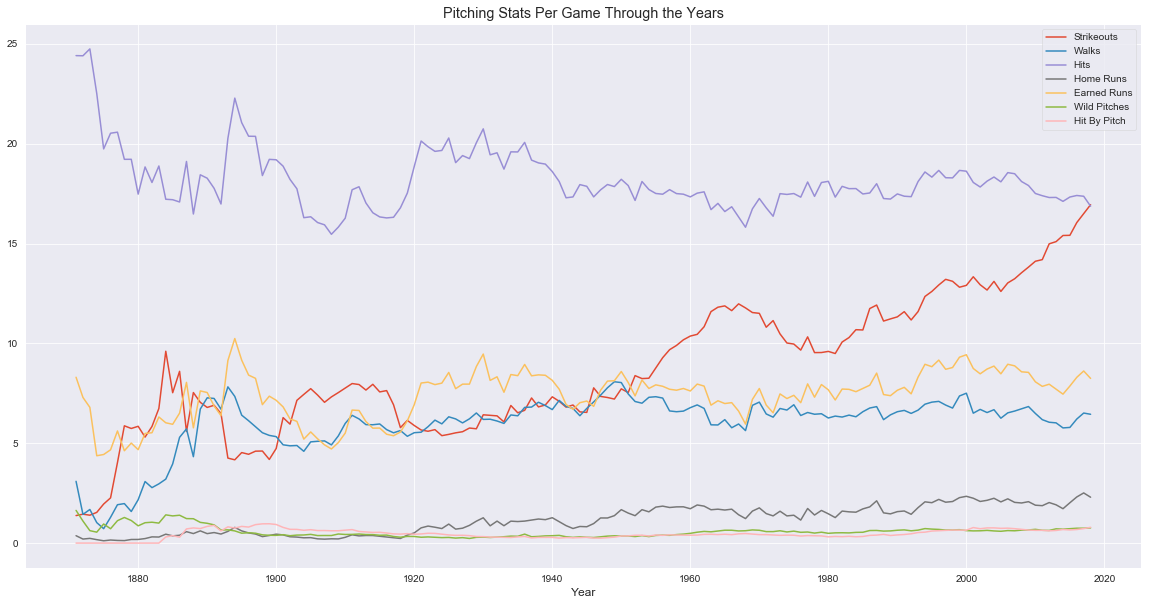

In [55]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(pitching_yearly_sum_df.index, pitching_yearly_sum_df["SO"]/pitching_yearly_sum_df["games_per_year"], label="Strikeouts")
ax.plot(pitching_yearly_sum_df.index, pitching_yearly_sum_df["BB"]/pitching_yearly_sum_df["games_per_year"], label="Walks")
ax.plot(pitching_yearly_sum_df.index, pitching_yearly_sum_df["H"]/pitching_yearly_sum_df["games_per_year"], label="Hits")
ax.plot(pitching_yearly_sum_df.index, pitching_yearly_sum_df["HR"]/pitching_yearly_sum_df["games_per_year"], label="Home Runs")
ax.plot(pitching_yearly_sum_df.index, pitching_yearly_sum_df["ER"]/pitching_yearly_sum_df["games_per_year"], label="Earned Runs")
ax.plot(pitching_yearly_sum_df.index, pitching_yearly_sum_df["WP"]/pitching_yearly_sum_df["games_per_year"], label="Wild Pitches")
ax.plot(pitching_yearly_sum_df.index, pitching_yearly_sum_df["HBP"]/pitching_yearly_sum_df["games_per_year"], label="Hit By Pitch")


ax.set_title("Pitching Stats Per Game Through the Years")
ax.set_xlabel("Year")
ax.legend()